# Final Assignment 22.1: Part 1: Parallel Computing with Pandas, NumPy, and DASK

### Learning Outcomes:
- 2. Run parallel operations in DASK.

## Assignment Overview

In Part 1 of the final assignment, you will compare the performance of the pandas, NumPy, and DASK *libraries* when doing calculations. In the first part, you will be working with NumPy and DASK *arrays* to analyze which *library* is faster. Next, you will make the same comparison working with pandas and DASK *dataframes*.

# Part 1: NumPy vs. DASK

In the first part of the assignment, you will compare the performance of the NumPy and DASK *libraries* when computing operations on a two-dimensional NumPy *array*.

Run the code cell below to import the necessary *libraries* for this portion of the final assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
import graphviz

## Question 1

In the code cell below, fill in the ellipsis to create a two-dimensional NumPy *array*, `arr`, with entries from 1 to 1,000 and dimensions 2,000 by 2,000.

In [2]:
arr = np.random.randint(1, 1001, (2000, 2000))

Now that you have defined the `arr` *array*, you can use the DASK `from_array()` *function* to create a DASK *array*.

## Question 2

In the code cell below, set the value of the `chunks` *argument* to be equal to a *tuple* with elements equal to 250 and 250.

This will divide the NumPy *array* into smaller *chunks*, each with dimensions 250 by 250.

In [3]:
darr = da.from_array(arr, chunks=(250,250))

DASK also allows you to visualize a summary of the DASK *array* by *printing* it to screen.

Run the code cell below.

In [4]:
darr

dask.array<array, shape=(2000, 2000), dtype=int32, chunksize=(250, 250), chunktype=numpy.ndarray>

## Question 3

What can you observe from the result *printed* above? What is the size of each *chunk*? How many *chunks* is the NumPy *array* being divided into?

This is an open-ended question that requires a written response.

Question 3: The Bytes is 15.26 MiB for the whole Array. Each Chunk is 244.14 kiB. There are 64 chunks in 1 graph layer. Each chunk is 250 by 250. 

Another way to visualize the size of the *chunks* is by calling the DASK `chunksize()` *function*.

Run the code cell below.

In [7]:
darr.chunksize

(250, 250)

## Question 4

Similarly as you did in the previous code cell, call the `npartitions` *method* on the DASK *array* to *print* the number of partitions to screen.

In [8]:
darr.npartitions

64

To begin comparing the performances of the NumPy and DASK *libraries* when performing operations on an *array*, you can start by computing the sum of all the entries across the rows of the *array*.

## Question 5

In the code cell below, set the `axis` *argument* equal to 0 to sum over the rows.

In [9]:
res = darr.sum(axis=0)

## Question 6

In the code cell below, call the correct DASK *function* to visualize how each row is summed.

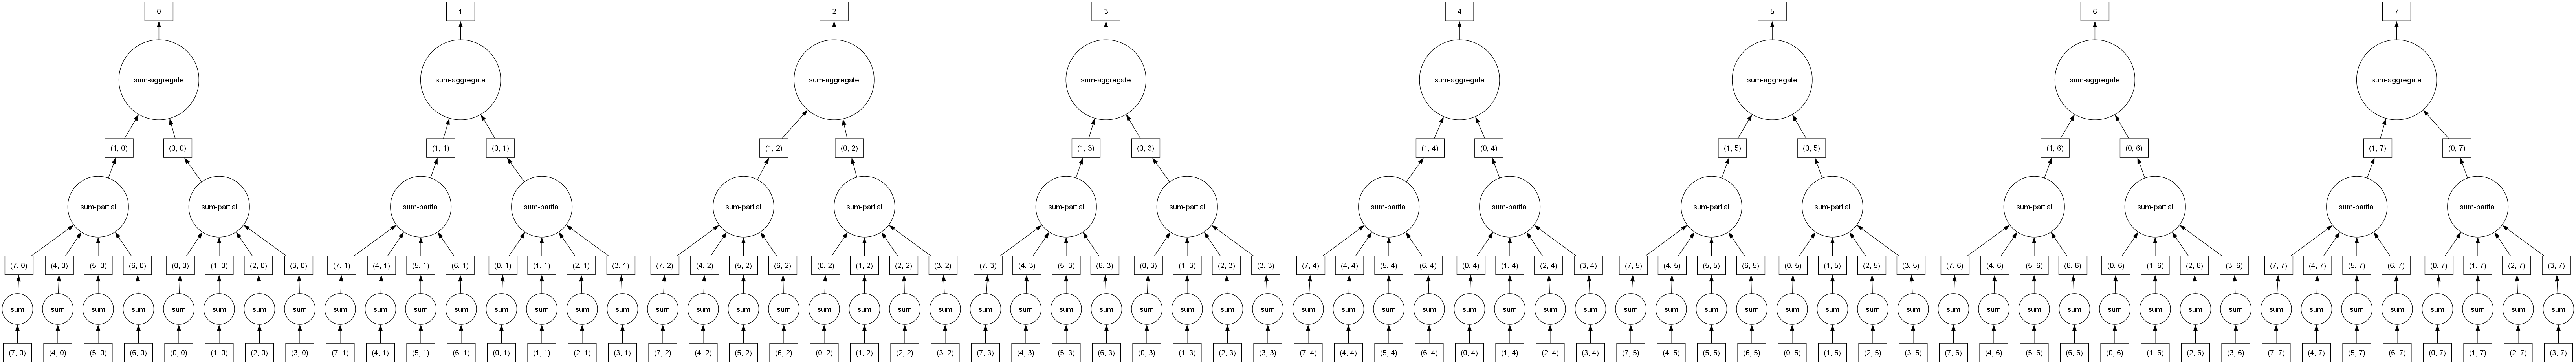

In [10]:
res.visualize()

## Question 7

Summarize your observations of the graph produced in the previous code cell.

This is an open-ended question that requires a written response.

Question 7: There are 8 sum aggregates, 16 sum partials, and 64 sum nodes.

Next, suppose that you want to perform some more advanced computations, such as computing the mean of the NumPy and DASK *arrays*.

Run the code cell below to define the `numpy_mean()` and `dask_mean()` *functions* that compute the mean of the NumPy and DASK *arrays*, respectively.

In [11]:
def numpy_mean(size=(10, 10)):
  arr = np.random.random(size=size)
  return arr.mean()

def dask_mean(size=(10, 10)):
  if size[0] > 10000: chunks = (1000, 1000)
  else: chunks = (int(size[0]/10), int(size[1]/10))
  
  arr = da.random.random(size=size, chunks=chunks)
  y = arr.mean()
  return y.compute()

The `dask_arr_chk()` and `numpy_arr_chk` *functions* defined in the code cell below compute the mean of each *chunk* in the *arrays* and return the wall clock time used to complete the operations.

Run the code cell below.

In [27]:
import time

def numpy_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(4):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      numpy_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return times

def dask_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(5):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      dask_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return times

Now it's time for you to compare the performances of NumPy and DASK *libraries* when computing parallel operations.

## Question 8

In the code below, call the `numpy_arr_chk()` *function* and assign the result to the `num_time` variable. 

In [13]:
%%time
num_time = numpy_arr_chk()

CPU times: total: 328 ms
Wall time: 821 ms


## Question 9

In the code below, call the `dask_arr_chk()` *function* and assign the result to the `dask_time` variable. 

In [14]:
%%time
dask_time = dask_arr_chk()

CPU times: total: 1.94 s
Wall time: 2.32 s


## Question 10

Which *library* performs better, NumPy or DASK? Why?

This is an open-ended question that requires a written response.

Question 10: Based on the recorded times, NumPy performs better for smaller array sizes due to its lower overhead. However, as the array size increases, DASK's parallel computing capabilities make it more efficient for larger datasets. This is evident from the increasing time taken by NumPy for larger arrays compared to DASK.

# Part 2: Pandas vs. DASK

In the second part of the assignment, you will be comparing the performances of the pandas and DASK *libraries* when operating on a *dataframe* with just over 25,000,000 rows.

Run the code cell below to import the necessary *libraries* for this part of the assignment.

In [15]:
import dask.dataframe as ddf
import time
import pandas as pd

c:\swe\code\parquet-feather-websocket-dask-mit-module-22\.venv\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


You will begin by reading a dataset that contains information about the salary of data scientists in India.

Because you want to compare the performance of the pandas and DASK *libraries*, you will start reading the data using the pandas *library*.

Run the code cell below.

Reference

Banerjee, Sourav. "Data Professionals Salary - 2022." Kaggle. 2022. https://www.kaggle.com/iamsouravbanerjee/analytics-industry-salaries-2022-india/version/9.

In [16]:
df_pandas = pd.read_csv('salary.csv')

Next, you will read the same data using the DASK *library*.

# Question 11

Complete the code in the cell below to read the same dataset using DASK. Use the DASK `read_csv()` *function*.

In [17]:
df_dask = ddf.read_csv('salary.csv')

You also need to define the `benchmark()` *function* that will help you to compare the performance between the two *libraries*.

Run the two code cells below.

In [18]:
def benchmark(function, function_name):
    start = time.time()
    function()
    end = time.time()
    print("{0} seconds for {1}".format((end - start), function_name))

In [19]:
def convert_pandas():
    return(df_pandas)
def convert_dask():
    return(df_dask)

Next, you can compare the performances for the two *dataframes*.

Run the code cell below.

In [20]:
benchmark(convert_pandas, 'dataframe pandas')
benchmark(convert_dask, 'dataframe DASK')

0.0 seconds for dataframe pandas
0.0 seconds for dataframe DASK


## Question 12

Which *dataframe* takes longer? Why?

This is an open-ended question that requires a written response.

Question 12: They both took 0.0 seconds. It's only 4,000 rows so the difference is too small.

Next, because the dataset is not large enough to make a meaningful comparison, you will concatenate the `df_pandas` and `df_dask` *dataframes* 5,000 times to increase the number of rows of data.

Run the cell below to create the new *dataframes*.

In [21]:
df_pandas_big = pd.concat([df_pandas for _ in range(5000)])

df_dask_big = pd.concat([df_pandas for _ in range(5000)])

In the code cell below, you will set up DASK to run in parallel.

## Question 13

Set the `npartition` *argument* inside of the `from_pandas` *function* equal to 2.

In [22]:
dfn = ddf.from_pandas(df_dask_big, npartitions=2)

In the code cell below, the necessary *functions* to compute the maximum value of the `Salary` column in the `dfn` and `df_pandas` *dataframes* are defined.

The `run_benchmarks()` *function*, which is used to compare the performances on both *dataframes*, is also defined.

In [23]:
def get_big_max_dask():
    return dfn.Salary.max().compute()
def get_big_max_pandas():
    return df_pandas.Salary.max()
    
def run_benchmarks():
    for i,f in enumerate([get_big_max_dask]):benchmark(f, f.__name__)

Run the code cell below to run the comparison between the `df_pandas_big` and `df_dask_big` *dataframes*.

In [26]:
run_benchmarks()
benchmark(get_big_max_dask, get_big_max_pandas.__name__)

7.1820597648620605 seconds for get_big_max_dask
7.4232165813446045 seconds for get_big_max_pandas


## Question 14

Which *library* takes less time to run, pandas, or DASK? Why?

This is an open-ended question and requires a written response.

Question 14: dask took less time (7.18 seconds) compared to pandas (7.42 seconds). 

Dask is designed to handle larger-than-memory computations and parallelize operations across multiple cores or even multiple machines. Here are a few reasons why Dask might take less time than Pandas:

Parallelism: Dask can parallelize operations, meaning it can perform multiple operations simultaneously across different CPU cores. Pandas, on the other hand, is typically single-threaded.

Lazy Evaluation: Dask uses lazy evaluation, which means it builds a task graph of operations and only executes them when necessary. This can optimize the execution plan and reduce redundant computations.

Out-of-Core Computation: Dask can handle datasets that don't fit into memory by breaking them into smaller chunks and processing them sequentially or in parallel. Pandas requires the entire dataset to fit into memory.

Optimized Algorithms: Dask may use more optimized algorithms for certain operations, especially when dealing with large datasets.